In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time


In [19]:

def transpuesta(A):
    m,n=A.shape
    D=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            D[i,j]=A[j,i]
    return D

def multMat(A,B):
    m,n=A.shape
    p,q=B.shape
    if n!=p:
        print("Error")
        return None
    C=np.zeros((m,q))
    for i in range(m):
        for j in range(q):
            for k in range(n):
                C[i,j]+=A[i,k]*B[k,j]
    return C


def multiplicar_matriz_vector(matriz, vector):
    filas = len(matriz)
    columnas = len(matriz[0])
    if columnas != len(vector):
        raise ValueError("Las dimensiones de la matriz y el vector no son compatibles.")

    resultado = [0] * filas
    for i in range(filas):
        for j in range(columnas):
            resultado[i] += matriz[i][j] * vector[j]

    return resultado

def solver(A, b):
    m, n = A.shape
    if m != n:
        print("Error: La matriz A debe ser cuadrada.")
        return None
    Ab = np.concatenate((A, b.reshape(-1, 1)), axis=1)
    for i in range(n):
        a = Ab[i, i]
        for j in range(i + 1, n):
            b = Ab[j, i]
            Ab[j, :] = Ab[j, :] - Ab[i, :] * b / a
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, n] - Ab[i, i + 1:n] @ x[i + 1:n]) / Ab[i, i]
    return x

#x=solver(A_trans,B_t)
def Coeficientes(A,B):
    A_trans=transpuesta(A)
    A_chida=multMat(A_trans,A)
    A_chida=np.array(A_chida)   

    B_t=multiplicar_matriz_vector(A_trans,B)
    B_t=np.array(B_t)
    coeficientes=solver(A_chida,B_t)
    return coeficientes
    





def grafica(A,B):
    coeficientes=Coeficientes(A,B)
    x=np.linspace(A[1,0]-1,A[-1,1]+4,len(A))
    recta=lambda x: coeficientes[0]+coeficientes[1]*x
    costo= lambda y, yaprox: np.sum((y-yaprox)**2)
    yaprox=recta(x)
    error=costo(B,yaprox)   
    par = {'title':'poblacion vs tiempo',
            'xlabel':'años',
            'ylabel':'poblacion (en millones de personas)'}
    plt.plot(x, yaprox, '-', label='Aproximación')
    plt.plot(A[:, 1], B, 'o', label='Datos')
    plt.title(par['title'])
    plt.xlabel(par['xlabel'])
    plt.ylabel(par['ylabel'])
    plt.text(x[-1], yaprox[-1], f'Error cuadrático: {error:.2f}', verticalalignment='top', horizontalalignment='right')
    plt.legend()


    


[7.54 0.15]


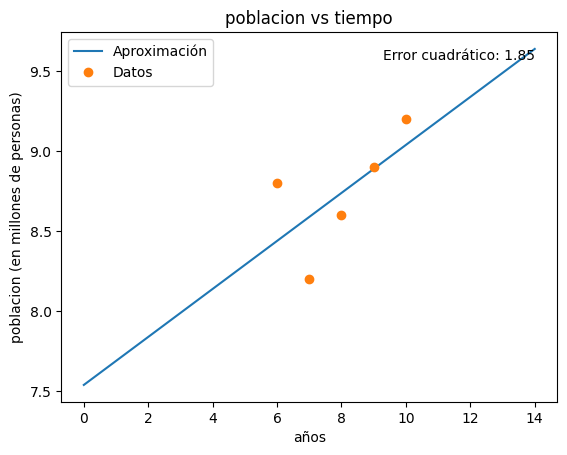

In [20]:
datos=[[6,8.8],[7,8.2],[8,8.6],[9,8.9],[10,9.2]]
A=[[1,6],[1,7],[1,8],[1,9],[1,10]]
A=np.array(A)   
B=[8.8,8.2,8.6,8.9,9.2]
B=np.array(B)
#f(x) = 0.15*x + 7.54
x=Coeficientes(A,B)
print(x)
grafica(A,B)

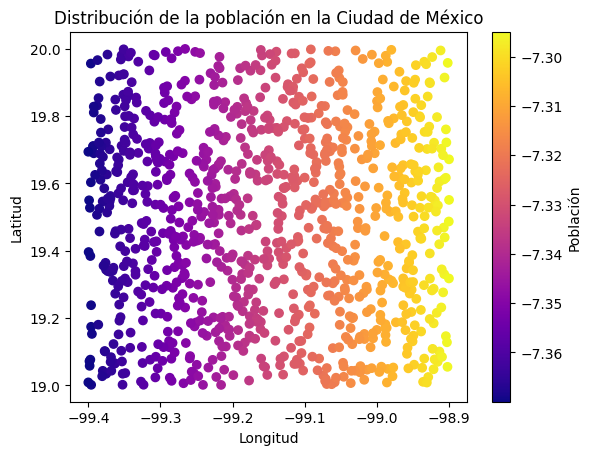

In [24]:
def f(x):
    return 0.15 * x + 7.54

# Definir los límites geográficos de la Ciudad de México
lat_min = 19.0  # Latitud mínima
lat_max = 20.0  # Latitud máxima
lon_min = -99.4  # Longitud mínima
lon_max = -98.9  # Longitud máxima

# Definir el número de puntos a generar y asignar población
num_points = 1000

def aleatorio(n, min_value, max_value):
    # Obtener una semilla basada en el reloj del sistema
    semilla = int(time.time() * 1000)
    a = 1664525
    c = 1013904223
    m = 2**32

    numero_aleatorio = []
    # Aplicar una operación matemática a la semilla para obtener un número aleatorio en el intervalo dado
    for i in range(n):
        semilla = (a * semilla + c) % m
        numero = min_value + (semilla / m) * (max_value - min_value)
        numero_aleatorio.append(numero)

    return numero_aleatorio




# Generar puntos aleatorios dentro de la Ciudad de México
points = []
for _ in range(num_points):
    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)
    points.append((lat, lon))

# Asignar personas a cada punto según la distribución obtenida
population = []
for point in points:
    lat, lon = point
    population.append(f(lon))

# Extraer las coordenadas latitud y longitud de los puntos generados
latitudes = [point[0] for point in points]
longitudes = [point[1] for point in points]

# Graficar los puntos
plt.scatter(longitudes, latitudes, c=population, cmap='plasma')
plt.colorbar(label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la población en la Ciudad de México')
plt.show()

el siguiente codigo genera este error: unsupported operand type(s) for ** or pow(): 'function' and 'int', me puedes ayudar  a solucionarlo por favor


def f(x):
    return 0.15 * x + 7.54

# Definir los límites geográficos de la Ciudad de México
lat_min = 19.0  # Latitud mínima
lat_max = 20.0  # Latitud máxima
lon_min = -99.4  # Longitud mínima
lon_max = -98.9  # Longitud máxima

# Definir el número de puntos a generar y asignar población
num_points = 1000

# Generar puntos aleatorios dentro de la Ciudad de México
points = []



def generate_seed():
    seed = int(time.time() /1000000 )  # Multiplicamos por 1000 para obtener una precisión mayor
    return seed


def generate_random_numbers(n, semilla, lower_bound, upper_bound):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero_normalizado = semilla 
        # Escalar el número al intervalo deseado
        numero = lower_bound + (numero_normalizado * (upper_bound - lower_bound))
        numero_aleatorio.append(numero)
    return numero_aleatorio


def generate_random_():
    semilla=generate_seed
    a=generate_random_numbers(1,semilla ,int(time.time()/1000 ),int(time.time()/100 ))[0]
    b=generate_random_numbers(1,semilla ,int(time.time()/1000 ),int(time.time()/100 ))[0]
    m=2**32
    semilla = (a * semilla + b) % m
    numero = semilla / m
    numero_aleatorio=numero
    return numero_aleatorio




def mid_square(n, semilla):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero = semilla / 10000
        numero_aleatorio.append(numero)
    return numero_aleatorio



def generate_random_numbers(n, semilla, lower_bound, upper_bound):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero_normalizado = semilla 
        # Escalar el número al intervalo deseado
        numero = lower_bound + (numero_normalizado * (upper_bound - lower_bound))
        numero_aleatorio.append(numero)
    return numero_aleatorio

# Generar puntos aleatorios dentro de la Ciudad de México
while len(points) < num_points:
    semilla= int(time.time() / 1000000)
    lat=generate_random_()
    lon= generate_random_()
    points.append((lat, lon))


# Asignar personas a cada punto según la distribución obtenida
population = []
for point in points:
    lat, lon = point
    population.append(f(lon))

# Extraer las coordenadas latitud y longitud de los puntos generados
latitudes = [point[0] for point in points]
longitudes = [point[1] for point in points]

# Graficar los puntos
plt.scatter(longitudes, latitudes, c=population, cmap='plasma')
plt.colorbar(label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la población en la Ciudad de México')
plt.show()


In [40]:


def f(x):
    return 0.15 * x + 7.54

# Definir los límites geográficos de la Ciudad de México
lat_min = 19.0  # Latitud mínima
lat_max = 20.0  # Latitud máxima
lon_min = -99.4  # Longitud mínima
lon_max = -98.9  # Longitud máxima

# Definir el número de puntos a generar y asignar población
num_points = 1000

# Generar puntos aleatorios dentro de la Ciudad de México
points = []



def generate_seed():
    seed = int(time.time() /1000000 )  # Multiplicamos por 1000 para obtener una precisión mayor
    return seed


def generate_random_numbers(n, semilla, lower_bound, upper_bound):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero_normalizado = semilla 
        # Escalar el número al intervalo deseado
        numero = lower_bound + (numero_normalizado * (upper_bound - lower_bound))
        numero_aleatorio.append(numero)
    return numero_aleatorio


def generate_random_():
    semilla=generate_seed
    a=generate_random_numbers(1,semilla ,int(time.time()/1000 ),int(time.time()/100 ))[0]
    b=generate_random_numbers(1,semilla ,int(time.time()/1000 ),int(time.time()/100 ))[0]
    m=2**32
    semilla = (a * semilla + b) % m
    numero = semilla / m
    numero_aleatorio=numero
    return numero_aleatorio




def mid_square(n, semilla):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero = semilla / 10000
        numero_aleatorio.append(numero)
    return numero_aleatorio



def generate_random_numbers(n, semilla, lower_bound, upper_bound):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero_normalizado = semilla 
        # Escalar el número al intervalo deseado
        numero = lower_bound + (numero_normalizado * (upper_bound - lower_bound))
        numero_aleatorio.append(numero)
    return numero_aleatorio

# Generar puntos aleatorios dentro de la Ciudad de México
while len(points) < num_points:
    semilla= int(time.time() / 1000000)
    lat=generate_random_()
    lon= generate_random_()
    points.append((lat, lon))


# Asignar personas a cada punto según la distribución obtenida
population = []
for point in points:
    lat, lon = point
    population.append(f(lon))

# Extraer las coordenadas latitud y longitud de los puntos generados
latitudes = [point[0] for point in points]
longitudes = [point[1] for point in points]

# Graficar los puntos
plt.scatter(longitudes, latitudes, c=population, cmap='plasma')
plt.colorbar(label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la población en la Ciudad de México')
plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'function' and 'int'

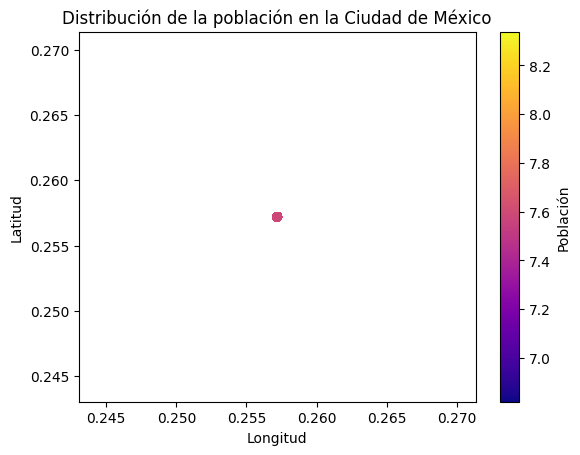

In [41]:
import time
import matplotlib.pyplot as plt

def f(x):
    return 0.15 * x + 7.54

def generate_seed():
    seed = int(time.time() / 1000000)
    return seed

def generate_random_numbers(n, semilla, lower_bound, upper_bound):
    numero_aleatorio = []
    for i in range(n):
        semilla = semilla ** 2
        semilla = str(semilla).zfill(8)
        semilla = semilla[2:6]
        semilla = int(semilla)
        numero_normalizado = semilla
        numero = lower_bound + (numero_normalizado * (upper_bound - lower_bound))
        numero_aleatorio.append(numero)
    return numero_aleatorio

def generate_random_():
    semilla = generate_seed()
    a = generate_random_numbers(1, semilla, int(time.time() / 1000), int(time.time() / 100))[0]
    b = generate_random_numbers(1, semilla, int(time.time() / 1000), int(time.time() / 100))[0]
    m = 2 ** 32
    semilla = (a * semilla + b) % m
    numero = semilla / m
    numero_aleatorio = numero
    return numero_aleatorio

lat_min = 19.0
lat_max = 20.0
lon_min = -99.4
lon_max = -98.9
num_points = 1000
points = []

while len(points) < num_points:
    lat = generate_random_()
    lon = generate_random_()
    points.append((lat, lon))

population = []
for point in points:
    lat, lon = point
    population.append(f(lon))

latitudes = [point[0] for point in points]
longitudes = [point[1] for point in points]

plt.scatter(longitudes, latitudes, c=population, cmap='plasma')
plt.colorbar(label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la población en la Ciudad de México')
plt.show()


el siguiente codigo genera numeros aleatorios con el metodo de cuadrados medios pudes modificarlo para que ahora genere numeros aleatorios en cualquier intervalo de numeros reales?
def mid_square(n, semilla):
    numero_aleatorio = []
    for i in range(n):
        # Elevar al cuadrado la semilla
        semilla = semilla ** 2
        # Convertir el número a cadena y rellenar con ceros a la izquierda
        semilla = str(semilla).zfill(8)
        # Extraer los 4 dígitos centrales
        semilla = semilla[2:6]
        # Convertir el número a entero
        semilla = int(semilla)
        # Normalizar el número entre 0 y 1
        numero = semilla / 10000
        numero_aleatorio.append(numero)
    return numero_aleatorio

In [37]:
print(int(time.time()/1000000 ))

1685


el siguiente codigo genera el error: can't multiply sequence by non-int of type 'float', puedes ayudarme a corregirlo?
def f(x):
    return 0.15 * x + 7.54

# Definir los límites geográficos de la Ciudad de México
lat_min = 19.0  # Latitud mínima
lat_max = 20.0  # Latitud máxima
lon_min = -99.4  # Longitud mínima
lon_max = -98.9  # Longitud máxima

# Definir el número de puntos a generar y asignar población
num_points = 1000

def aleatorio(n, min_value, max_value):
    # Obtener una semilla basada en el reloj del sistema
    semilla = int(time.time() * 1000)
    a = 1664525
    c = 1013904223
    m = 2**32

    numero_aleatorio = []
    # Aplicar una operación matemática a la semilla para obtener un número aleatorio en el intervalo dado
    for i in range(n):
        semilla = (a * semilla + c) % m
        numero = min_value + (semilla / m) * (max_value - min_value)
        numero_aleatorio.append(numero)

    return numero_aleatorio



# Generar puntos aleatorios dentro de la Ciudad de México
points = []
for _ in range(num_points):
    '''lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)'''
    lat = aleatorio(1, lat_min, lat_max)
    lon = aleatorio(1, lon_min, lon_max)
    points.append((lat, lon))

# Asignar personas a cada punto según la distribución obtenida
population = []
for point in points:
    lat, lon = point
    population.append(f(lon))

# Extraer las coordenadas latitud y longitud de los puntos generados
latitudes = [point[0] for point in points]
longitudes = [point[1] for point in points]

# Graficar los puntos
plt.scatter(longitudes, latitudes, c=population, cmap='plasma')
plt.colorbar(label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución de la población en la Ciudad de México')
plt.show()

considerando el siguiente proyecto
# Proyecto: Simulación de la distribución de la población en la Ciudad de México y proyección de su crecimiento a futuro utilizando Python

Descripción: Este proyecto tiene como objetivo simular la distribución de la
población en la Ciudad de México utilizando el método de Monte Carlo y el ajuste
de datos por mínimos cuadrados lineales. Además, se buscará realizar una
proyección del crecimiento de la población a futuro. El proyecto se llevará a cabo en
los siguientes pasos:
1. Recopilación de datos: Se recopilarán datos de diversas fuentes, como el
Instituto Nacional de Estadística y Geografía (INEGI), el Consejo Nacional de
Población (CONAPO), entre otros, para obtener información sobre la
población actual de la Ciudad de México y las tendencias de crecimiento
poblacional.
2. Creación del modelo matemático: Se utilizará el método de ajuste de datos
por mínimos cuadrados lineales para ajustar una función matemática a los
datos recopilados. La función matemática permitirá representar la
distribución de la población en la Ciudad de México.
3. Simulación de la distribución de la población: Se utilizará el método de Monte
Carlo para generar una gran cantidad de puntos aleatorios dentro de la
Ciudad de México y asignar personas a cada punto según la distribución
obtenida en el modelo matemático. 

si se sabe que utilizando el metodo de minimos cuadrados se obtiene la siguiente funcion   f(x) = 0.15*x + 7.54
como se puede abordar el problema de la simulacion de la distribucion de la poblacion en la ciudad de mexico utilizando el metodo de montecarlo
